In [ ]:
import matplotlib.pyplot as plt   # Отрисовка изображений в Colab
from PIL import Image, ImageDraw  # Библиотека для работы с изображениями
import math
import numpy as np
import sys
import os

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def showImage(i):
  img = img.astype('uint8')           # Меняем тип на однобайтовый без знака
  img = Image.fromarray(img)          # Переводим массив в изображение
  img = img.convert('RGBA')           # Конвертируем в нужное цветовое представление
  plt.imshow(img)                     # Отрисовываем картинку
  plt.show()                          # Выводим картинку

def loadImage(file_name, image_type='color'):
  image = Image.open(file_name)

  if image_type != 'color':
    image = image.convert('L')  # К ЧБ

  image_width  = image.size[0]  # Получаем ширину
  image_height = image.size[1]  # Получаем высоту

  image_data = image.getdata()      # Получаем данные картинки
  image_data = np.array(image_data) # Преобразуем в np массив

  if image_type == 'color':
    image = image_data.reshape(image_height, image_width, 3) #3 - для 3х мерного массива. Т.е. для цветного изображения
  else:
    image = image_data.reshape(image_height, image_width) # 3-его аргумента нет, т.к. работаем с ЧБ изображением

  return image, image_width, image_height # Возвращаем массив с пикселями и размерность изображения

# Функция наложения изображения
# template - это изображение подложки (на которую будет наложено новое изображение)
# layer  - это изображение накладываемого слоя
# width  - оступ слева
# height - отступ справа

def addLayer(template, layer, width_space, height_space):
  template_image  = template[0]
  template_width  = template[1]
  template_height = template[2]

  layer_image  = layer[0]
  layer_width  = layer[1]
  layer_height = layer[2]

  out_image = template_image.copy()

  # Находим координаты для начала наложения ватермарки
  width_start  = width_space                                   # Начало накладывания изображения слева
  height_start = template_height - layer_height - height_space # Начало накладывания изображения снизу

  # Пробегаемся по массиву и заменяем пиксели на подложке на пиксели из накладываемого слоя
  for w in range(layer_width):
    for h in range(layer_height):
      pixel = layer_image[h][w]  # Получим значение пикселя накладываемого изображения
      out_image[height_start + h][width_start + w] = [ pixel, pixel, pixel ]   # Заменим значение пикселя подложки на значение пикселя накладываемого слоя

  return out_image, template_width, template_height

# price - стоимость из цифр
# currency - символ валюты, в которой указана цена.
def makepricetagImage(price, currency, debug = False):
  
  pricetag = loadImage('/content/drive/MyDrive/Colab Notebooks/Machine learning/Images/Working with images/Task 3/pricetag details/pricetagTemplate.png');

  if debug:
    showImage(pricetag[0])
  
# ----------------------------- Формирование цены -----------------------------------------

  # Определяем начальную точку, откуда будем формировать ценник
  width_num  = 138
  height_num = 25

  # Количество пикселей между знаками в номере
  space = 20

  # Сформируем цену
  for digit in price:
    # Загружаем ЧБ изображение
    symbol = loadImage('/content/drive/MyDrive/Colab Notebooks/Machine learning/Images/Working with images/Task 3/pricetag details/'+digit+'.png', 'bw') 
    
    pricetag = addLayer(pricetag, symbol, width_num, height_num) # Добавляем цифру на выходное изображение
    if debug:
      showImage(pricetag[0]) # отобразим выходное изображения с очередной наложенной цифрой

    width_num += symbol[1] + space

  if currency == '$':
    # --------------------------- Формирование валюты ---------------------------------------

    # Определяем начальную точку, откуда будем формировать валюту
    width_num  = 480
    height_num = 54

    # Количество пикселей между знаками в номере
    space = 4

    # Сформируем знак валюты
    symbol = loadImage('/content/drive/MyDrive/Colab Notebooks/Machine learning/Images/Working with images/Task 3/pricetag details/Dollar.png', 'bw')

    # Добавляем нак валюты на выходное изображение
    pricetag = addLayer(pricetag, symbol, width_num, height_num)

    width_num += symbol[1] + space

  return pricetag[0]

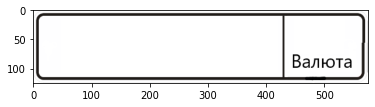

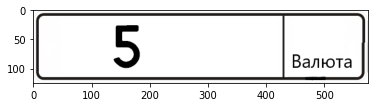

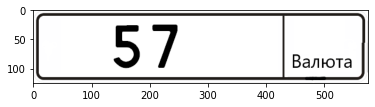

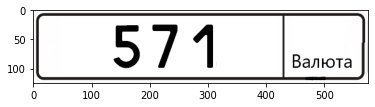

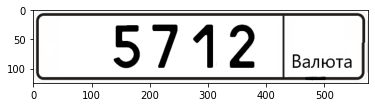

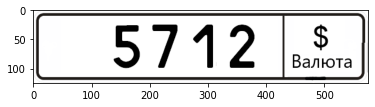

In [ ]:
# Сформируем знак
pricetag = makepricetagImage('5712','$', True)

# Записываем полученное изображение в файл
pricetag = pricetag.astype('uint8')
img_pricetag = Image.fromarray(pricetag)
img_pricetag.save("pricetag.png", "PNG")

showImage(pricetag)